<a href="https://colab.research.google.com/github/Amit32624/dbpedia_prj/blob/master/clustering_tf-idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TF-IDF Pre-processing


In [1]:
import re
import nltk
import pandas as pd
from pandas import DataFrame, Series
from nltk.corpus import stopwords

import random
from gensim.models import Word2Vec
from nltk import word_tokenize
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

nltk.download("stopwords")
import os
SEED = 55
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving med_devs_clean_data.csv to med_devs_clean_data.csv


In [3]:
df = pd.read_csv('med_devs_clean_data.csv')

In [4]:
df.head()

,Name,Description,Category
0,Implantable loop recorder,"An implantable loop recorder (ILR), also known...",Implants (medicine)
1,Health Canada,"Health Canada (HC; French: Santé Canada, SC) i...",Regulation of medical devices
2,Visual prosthesis,"A visual prosthesis, often referred to as a bi...","Implants (medicine),Neuroprosthetics"
3,Medical Devices Directive,The Medical Device Directive (Council Directiv...,Regulation of medical devices
4,Nasal spray,Nasal sprays are used to deliver medications l...,"Drug delivery devices,Nasal sprays"


In [5]:
from google.colab import files
uploaded = files.upload()

Saving med_equips_clean_data.csv to med_equips_clean_data.csv


In [6]:
df1 = pd.read_csv('med_equips_clean_data.csv')
df1.head(3)

,Name,Description,Category
0,Cephalometry,Cephalometry is the study and measurement of t...,Medical imaging
1,Cephalotribe,A cephalotribe was a medical instrument used i...,Surgical instruments
2,Implantable loop recorder,"An implantable loop recorder (ILR), also known...","Cardiac electrophysiology,Implants (medicine),..."


In [7]:
medical_data = pd.concat([df, df1], axis=0,ignore_index=True)
medical_data.shape

(1804, 3)

In [8]:
medical_data['text_data'] = medical_data['Name'].astype(str).str.cat(medical_data['Description'].astype(str).str.cat(medical_data['Category']), sep=',')
medical_data.head()

,Name,Description,Category,text_data
0,Implantable loop recorder,"An implantable loop recorder (ILR), also known...",Implants (medicine),"Implantable loop recorder,An implantable loop ..."
1,Health Canada,"Health Canada (HC; French: Santé Canada, SC) i...",Regulation of medical devices,"Health Canada,Health Canada (HC; French: Santé..."
2,Visual prosthesis,"A visual prosthesis, often referred to as a bi...","Implants (medicine),Neuroprosthetics","Visual prosthesis,A visual prosthesis, often r..."
3,Medical Devices Directive,The Medical Device Directive (Council Directiv...,Regulation of medical devices,"Medical Devices Directive,The Medical Device D..."
4,Nasal spray,Nasal sprays are used to deliver medications l...,"Drug delivery devices,Nasal sprays","Nasal spray,Nasal sprays are used to deliver m..."


In [9]:
med_data =medical_data.drop_duplicates(subset=['text_data'],ignore_index=True)

In [10]:
med_data.shape

(1500, 4)

#USING NLTK

In [11]:
 nltk.download('punkt')
 nltk.download('stopwords')
 nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
corpus =[]

for i in range(len(med_data['text_data'])):
    review = med_data.loc[i, "text_data"]
    review = review.lower()
    review = re.sub('[^a-zA-Z]',' ',review)
    review = re.sub(r"\s+", " ", review)  # Remove multiple spaces in content
    review = re.sub(r"\w+…|…", "", review)  # Remove ellipsis (and last word)
    review = re.sub(r"(?<=\w)-(?=\w)", " ", review)
    review = review.split() # Replace dash between words
    review =' '.join(review)
    corpus.append(review)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
                                max_features=100,
                                max_df=0.7,
                                min_df=2,
                                ngram_range = (1,5),
                                stop_words = "english"

)
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

In [14]:
from sklearn.cluster import KMeans
sil = []
wcss = []
# 'cl_num' is the number of clusters
#  it is completely arbitrary.
cl_num = 16
for i in range(2,cl_num):
    
    knn_model = KMeans(n_clusters=i, init="k-means++", max_iter=100, n_init=1)
    
    knn_model.fit(vectors)
    
    wcss.append(knn_model.inertia_)
    labels = knn_model.labels_
    sil.append(silhouette_score(vectors, labels, metric = 'euclidean'))

Text(0, 0.5, 'WCSS: Within-cluster Sum of Squares')

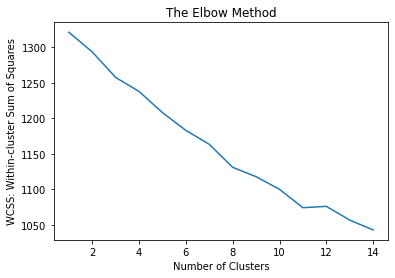

In [15]:
# Plot the number of clusters vs WCSS
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score



number_clusters = range(1,15)
plt.plot(number_clusters,wcss[0:14])
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS: Within-cluster Sum of Squares')

Text(0, 0.5, 'Silhouette score')

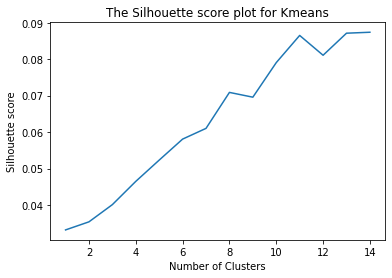

In [16]:
# Plot the number of clusters vs WCSS
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score



number_clusters = range(1,15)
plt.plot(number_clusters,sil[0:14])
plt.title('The Silhouette score plot for Kmeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')

###### SILHOUETEE METHOD and clustering analysis

For n_clusters = 3 The average silhouette_score is : 0.03239961415306098
For n_clusters = 5 The average silhouette_score is : 0.04721452773089773
For n_clusters = 6 The average silhouette_score is : 0.055779757807904944
For n_clusters = 7 The average silhouette_score is : 0.0602425170380982
For n_clusters = 9 The average silhouette_score is : 0.07272379519103808
For n_clusters = 11 The average silhouette_score is : 0.08998475410297199
For n_clusters = 13 The average silhouette_score is : 0.09519462934135055


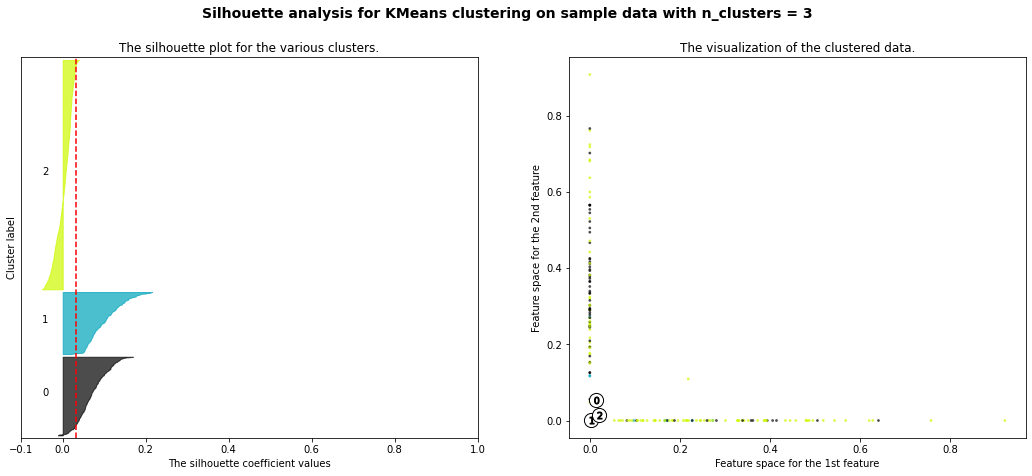

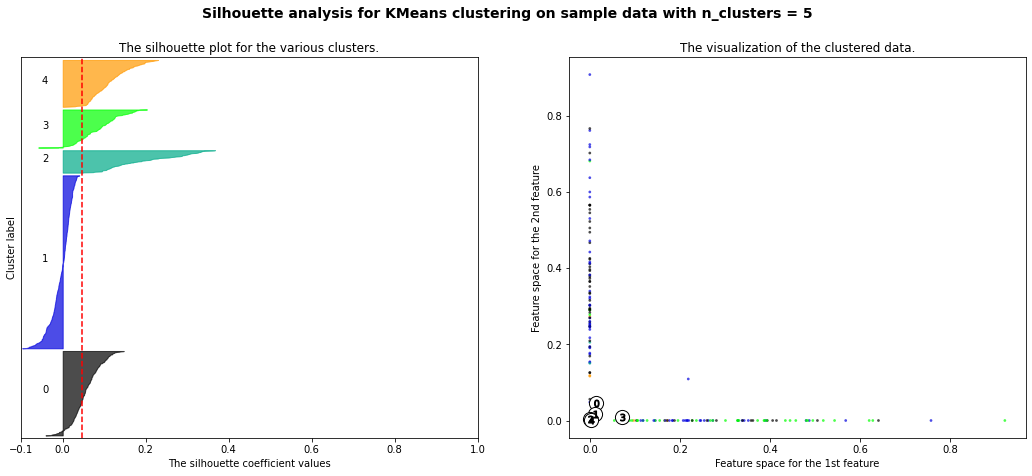

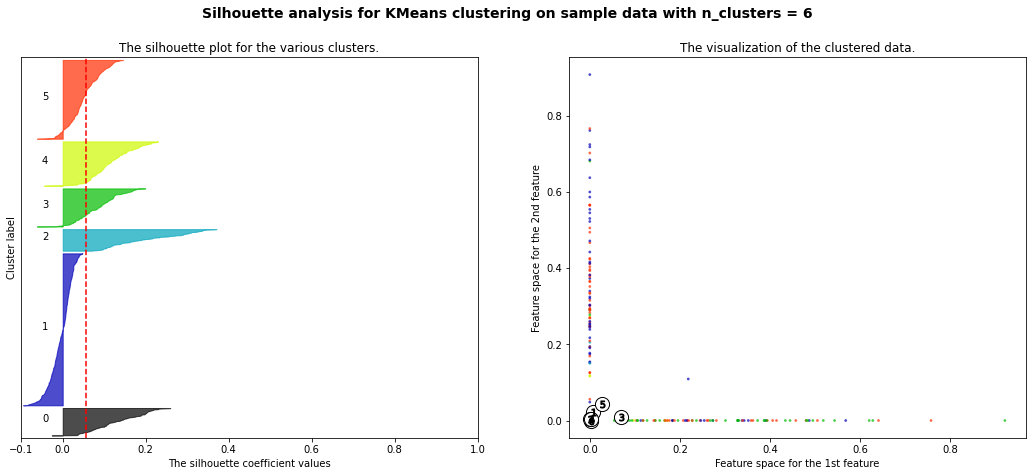

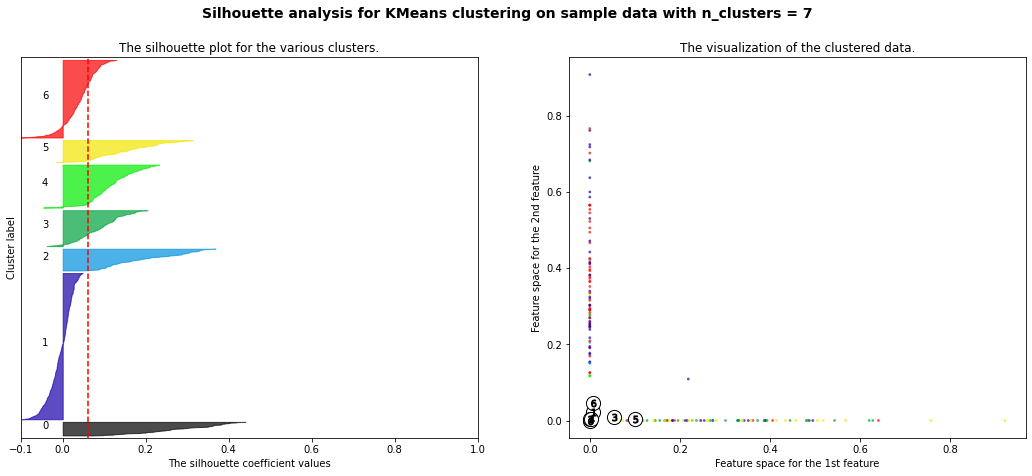

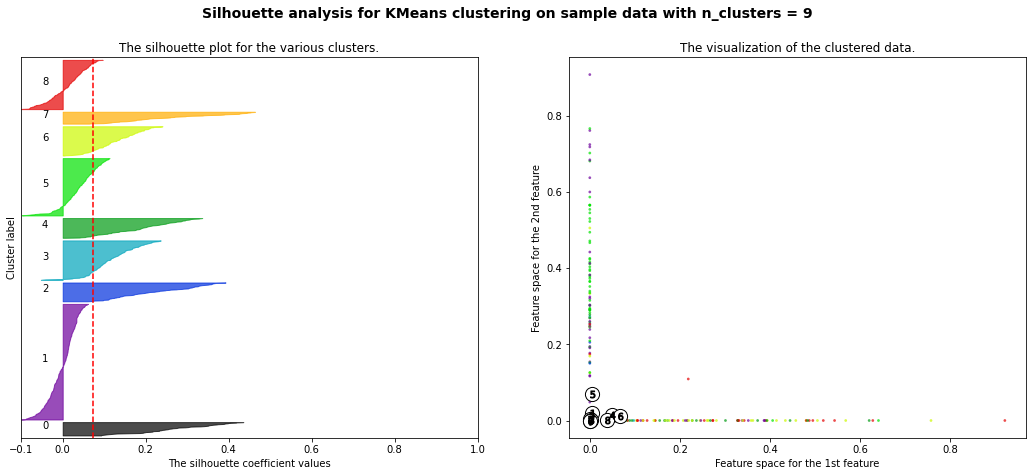

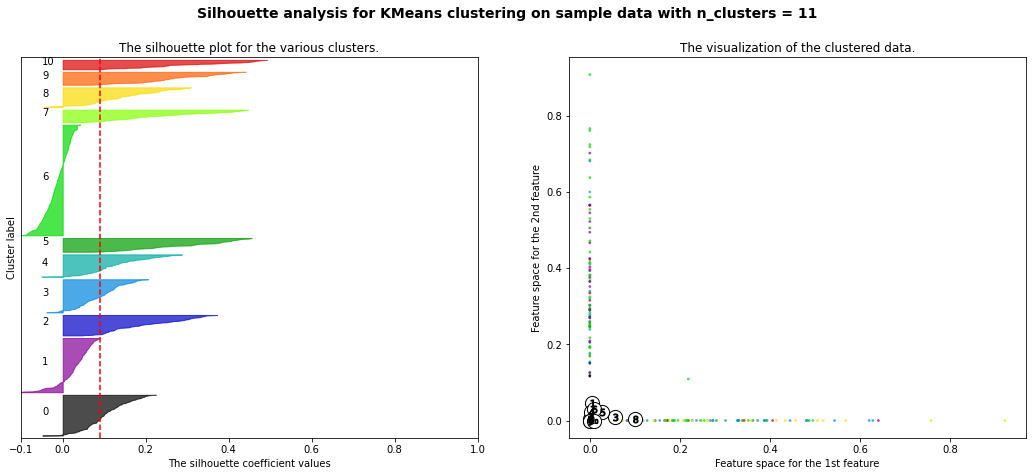

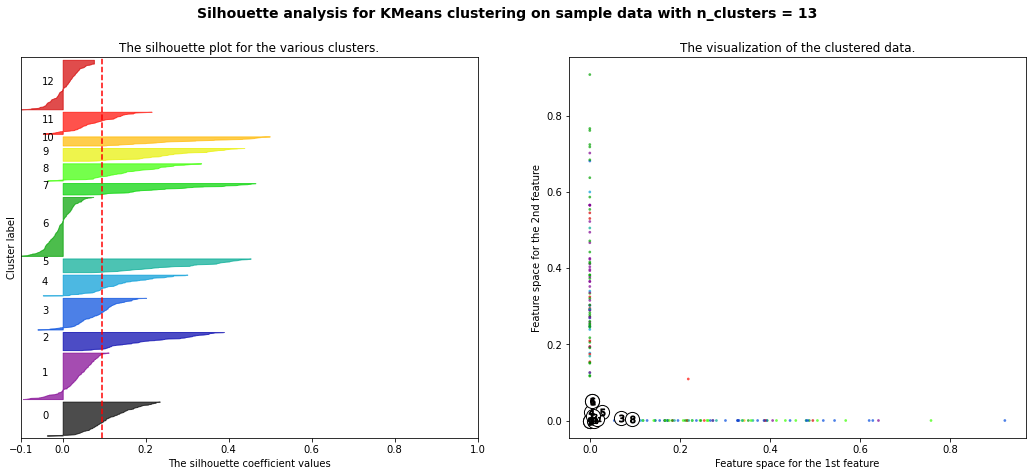

In [17]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = np.array(denselist)
range_n_clusters = [3,5,6,7,9,11,13]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init="k-means++", random_state=200)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean',sample_size=1000,random_state=200)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
      # print ("Silhouette score for k(clusters) = "+str(i)+" is "
      #      +str(metrics.silhouette_score(vectorized_docs,labels,metric="euclidean",sample_size=1000,random_state=200)))
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [18]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
def mbkmeans_clusters(
	X, 
    k, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=10).fit(X)
    # km = KMeans(n_clusters=k,init="k-means++", random_state=200).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [23]:

docs = med_data['text_data'].values
clustering, cluster_labels = mbkmeans_clusters(
	X=np.array(denselist),
    k=20,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in all_keywords],
    "cluster": cluster_labels
})

For n_clusters = 20
Silhouette coefficient: 0.08
Inertia:1024.5312060589088
Silhouette values:
    Cluster 0: Size:54 | Avg:0.30 | Min:0.07 | Max: 0.47
    Cluster 7: Size:57 | Avg:0.24 | Min:-0.02 | Max: 0.43
    Cluster 8: Size:50 | Avg:0.22 | Min:-0.01 | Max: 0.45
    Cluster 4: Size:49 | Avg:0.21 | Min:0.09 | Max: 0.36
    Cluster 14: Size:32 | Avg:0.21 | Min:0.03 | Max: 0.39
    Cluster 1: Size:84 | Avg:0.16 | Min:-0.08 | Max: 0.33
    Cluster 12: Size:31 | Avg:0.15 | Min:0.02 | Max: 0.30
    Cluster 10: Size:53 | Avg:0.14 | Min:-0.01 | Max: 0.30
    Cluster 18: Size:29 | Avg:0.14 | Min:0.03 | Max: 0.31
    Cluster 6: Size:18 | Avg:0.13 | Min:0.03 | Max: 0.30
    Cluster 11: Size:79 | Avg:0.12 | Min:-0.05 | Max: 0.30
    Cluster 2: Size:63 | Avg:0.11 | Min:-0.03 | Max: 0.28
    Cluster 19: Size:17 | Avg:0.11 | Min:0.01 | Max: 0.22
    Cluster 9: Size:75 | Avg:0.09 | Min:-0.09 | Max: 0.24
    Cluster 16: Size:37 | Avg:0.08 | Min:-0.03 | Max: 0.23
    Cluster 15: Size:69 | Avg:0.08 

In [24]:
df_clusters
print(df_clusters['text'][0])
print(df_clusters['tokens'][0])

Implantable loop recorder,An implantable loop recorder (ILR), also known as an insertable cardiac monitor (ICM), is a small device about the size of a pack of chewing gum or USB memory stick that is implanted just under the skin of the chest for cardiac monitoring (that is, to record the heart's electrical activity).Implants (medicine)
activity cardiac device electrical heart implants implants medicine known medicine skin small


In [25]:
df_clusters.head()

,text,tokens,cluster
0,"Implantable loop recorder,An implantable loop ...",activity cardiac device electrical heart impla...,1
1,"Health Canada,Health Canada (HC; French: Santé...",devices health human including known medical m...,3
2,"Visual prosthesis,A visual prosthesis, often r...",developed device devices electrical implant im...,10
3,"Medical Devices Directive,The Medical Device D...",device devices medical medical device medical ...,5
4,"Nasal spray,Nasal sprays are used to deliver m...",blood brain delivery devices disease drug incl...,4


In [27]:
from collections import Counter
for i in range(20):
    tokens_per_cluster = ""
    most_frequent = Counter(" ".join(df_clusters.query(f"cluster == {i}")["tokens"]).split()).most_common(5)
    for t in most_frequent:
        tokens_per_cluster += f"{t[0]}({str(t[1])}) "
    print(f"Cluster {i}: {tokens_per_cluster}")

Cluster 0: resonance(192) imaging(162) magnetic(150) medical(45) mri(31) 
Cluster 1: heart(72) cardiac(67) medical(50) medicine(49) implants(44) 
Cluster 2: imaging(131) medical(128) used(22) image(21) images(14) 
Cluster 3: used(227) medical(137) use(101) known(95) surgical(93) 
Cluster 4: drug(49) delivery(46) devices(46) used(24) use(16) 
Cluster 5: medical(210) device(130) devices(84) company(46) equipment(22) 
Cluster 6: data(18) imaging(14) medical(9) image(8) resonance(8) 
Cluster 7: radiation(54) therapy(42) used(29) cancer(26) medical(22) 
Cluster 8: radiology(50) imaging(22) medical(22) ray(10) radiation(8) 
Cluster 9: used(52) imaging(52) contrast(50) agents(48) ray(44) 
Cluster 10: implants(75) medicine(69) implant(31) medical(31) bone(29) 
Cluster 11: brain(79) imaging(39) resonance(34) used(29) computer(28) 
Cluster 12: medicine(28) medical(14) university(13) used(6) including(5) 
Cluster 13: imaging(57) tomography(36) medical(24) used(23) resonance(20) 
Cluster 14: ameri

Retrieve most representative documents (based on clusters' centroids)

In [28]:
test_cluster = 8
most_representative_docs = np.argsort(
    np.linalg.norm(denselist - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:5]:
    print(docs[d])
    print("-------------")

International Day of Radiology,The International Day of Radiology (IDoR) is an annual event promoting the role of medical imaging in modern healthcare. It is celebrated on November 8 each year and coincides with the anniversary of the discovery of x-rays. It was first introduced in 2012, as a joint initiative of the European Society of Radiology (ESR), the Radiological Society of North America (RSNA), and the American College of Radiology (ACR). The International Day of Radiology is acknowledged and celebrated by nearly 200 national, sub-speciality, and related societies around the world.Radiology
-------------
Journal of Vascular and Interventional Radiology,The Journal of Vascular and Interventional Radiology, also known as JVIR, is a monthly peer-reviewed medical journal covering all aspects of interventional radiology. It was established in 1990 and is an official journal of the Society of Interventional Radiology. It is published by Elsevier. The editor-in-chief is Daniel Y. Sze, 

Retrieve a random sample of documents for a given cluster

In [29]:
for i,t in enumerate(df_clusters.query(f"cluster == {test_cluster}").sample(4).iterrows()):
    print(t[1]["text"])
    print("-------------")

Terry Thomas sign,In radiology, the Terry Thomas sign is a scapholunate ligament dissociation on an anteroposterior view of the wrist. Most commonly a result of a fall on the outstretched hand (FOOSH), the scapholunate ligament ruptures resulting in separation of the lunate and scaphoid bones. This burst causes the scaphoid bone to dorsally rotate. A gap of more than 3mm is pathognomonic for scapholunate dissociation. The resulting separation between the scaphoid and lunate bones leaves a space on the x-ray that is similar to the gap comedian Terry-Thomas had between his front teeth. For newer radiology students who do not know who Terry-Thomas was, this finding might also be known as the David Letterman sign.Radiologic signs
-------------
Royal College of Radiologists,The Royal College of Radiologists (RCR) is the professional body responsible for the specialty of clinical oncology and clinical radiology throughout the United Kingdom. Its role is to advance the science and practice of

## Implemenation of  K-mediods
https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/

In [30]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 7.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [31]:
from sklearn_extra.cluster import KMedoids
sil=[]
wcss = []
# 'cl_num' is the number of clusters
#  it is completely arbitrary.
cl_num = 20
for i in range(2,cl_num):
    
    kmedoids = KMedoids(n_clusters=i, random_state=0,metric='cosine', init='heuristic')
    kmedoids.fit(vectors)
    wcss.append(kmedoids.inertia_)
    labels =kmedoids.labels_
    sil.append(silhouette_score(vectors, labels, metric = 'cosine'))

Text(0, 0.5, 'WCSS: Within-cluster Sum of Squares')

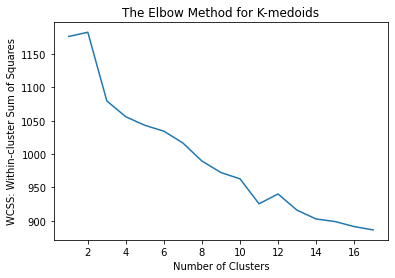

In [32]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score



number_clusters = range(1,18)
plt.plot(number_clusters,wcss[0:17])
plt.title('The Elbow Method for K-medoids')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS: Within-cluster Sum of Squares')

Text(0, 0.5, 'Silhouette score')

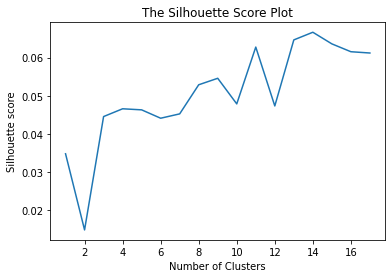

In [33]:
# Plot solhouette score
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score



number_clusters = range(1,18)
plt.plot(number_clusters,sil[0:17])
plt.title('The Silhouette Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.05591568313707648
For n_clusters = 3 The average silhouette_score is : 0.05575540076563071
For n_clusters = 4 The average silhouette_score is : 0.05711706853717585
For n_clusters = 5 The average silhouette_score is : 0.059988139706442865
For n_clusters = 6 The average silhouette_score is : 0.061457502094045935
For n_clusters = 7 The average silhouette_score is : 0.05883530374657284
For n_clusters = 8 The average silhouette_score is : 0.0419333864119202
For n_clusters = 9 The average silhouette_score is : 0.05966619786442138
For n_clusters = 10 The average silhouette_score is : 0.04612609147183022
For n_clusters = 11 The average silhouette_score is : 0.05218527574276385
For n_clusters = 12 The average silhouette_score is : 0.052193997057210194
For n_clusters = 13 The average silhouette_score is : 0.044089531202412074


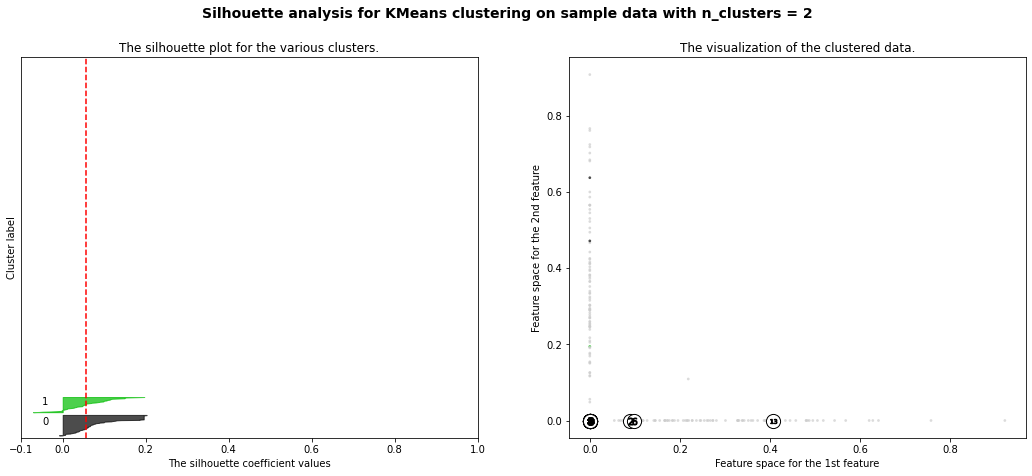

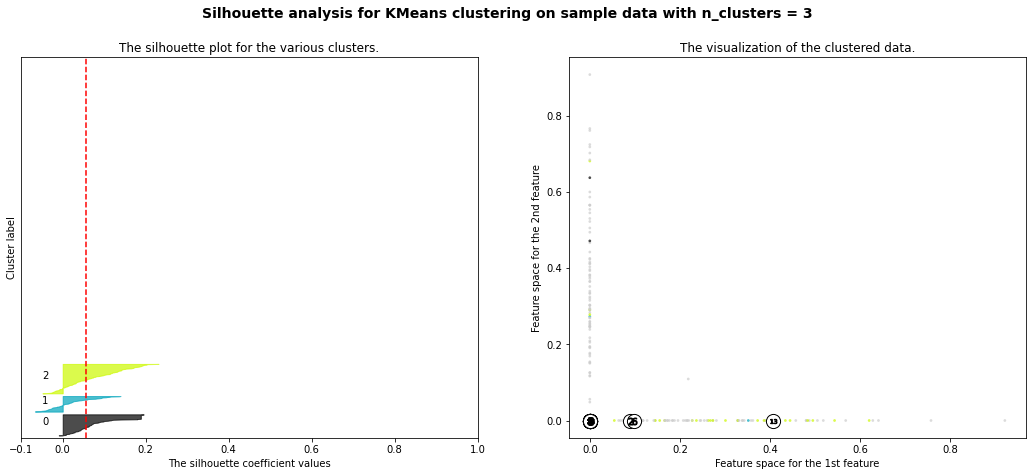

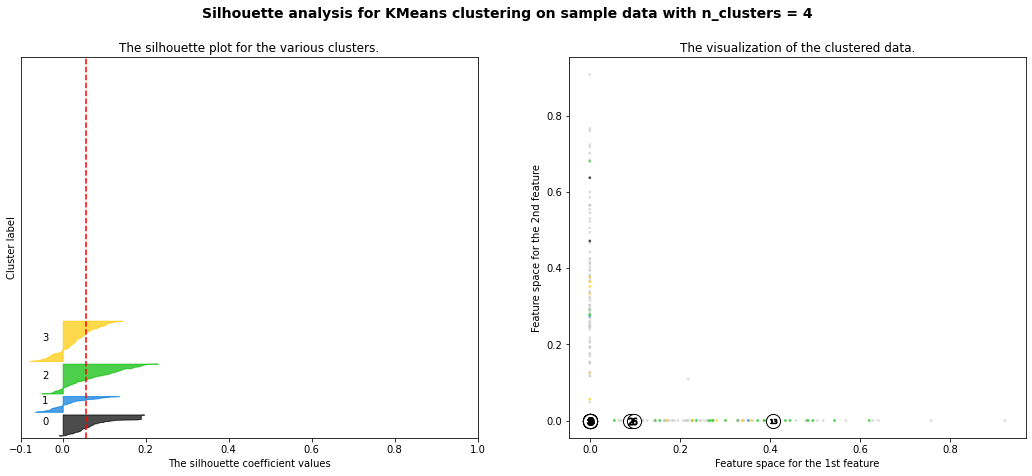

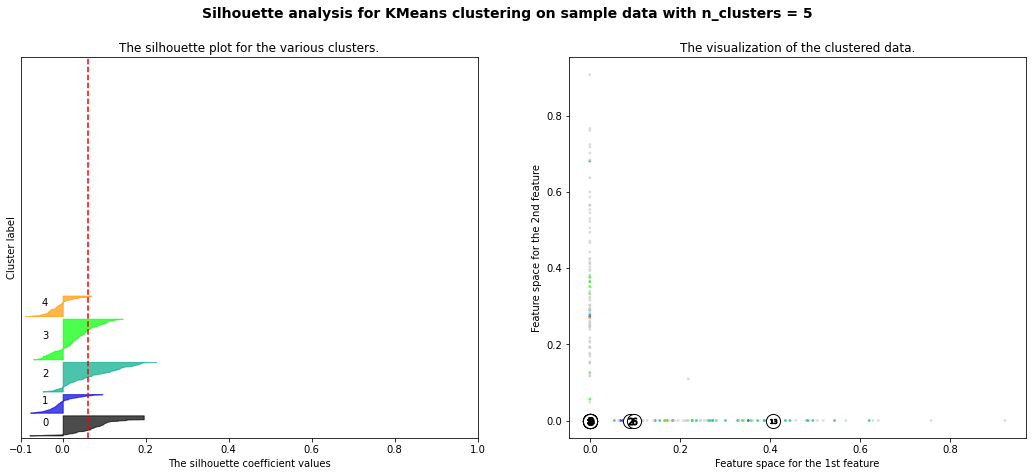

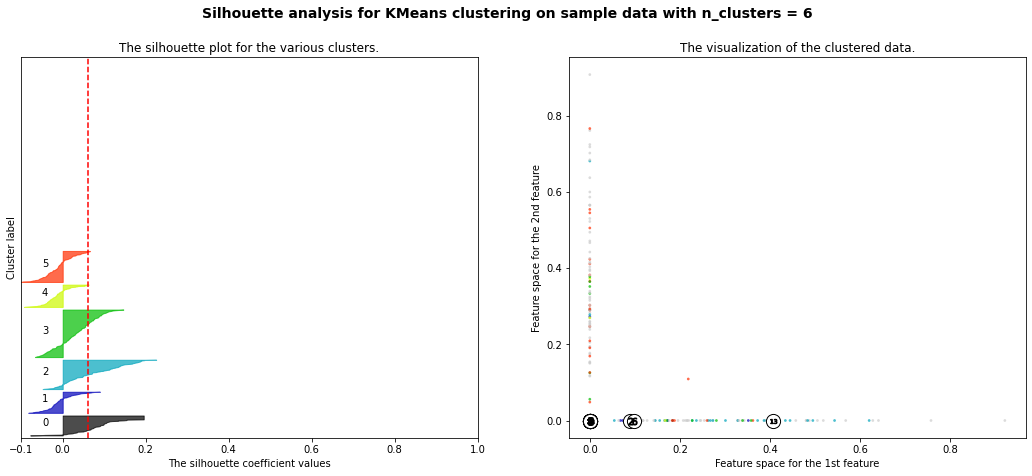

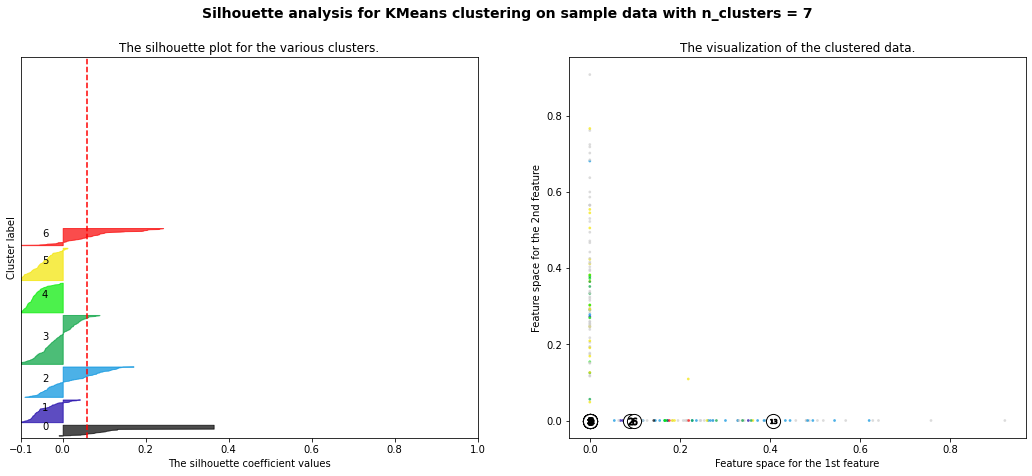

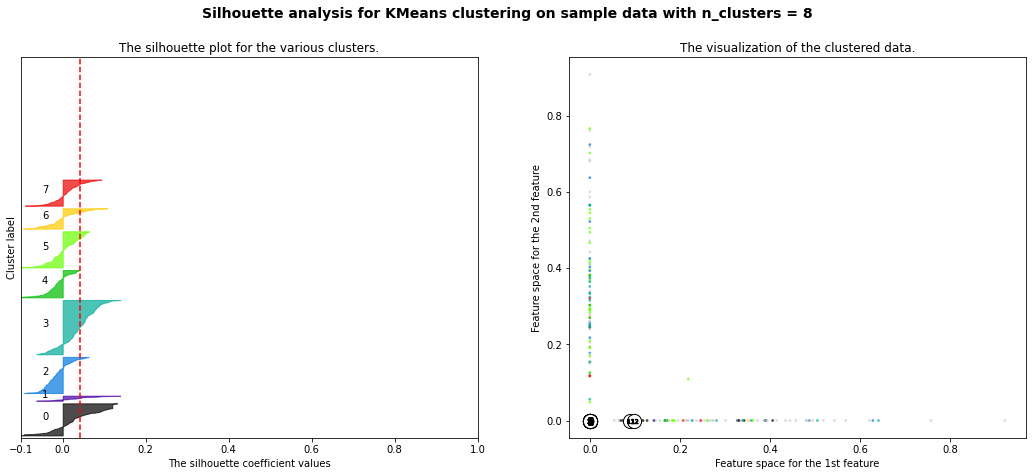

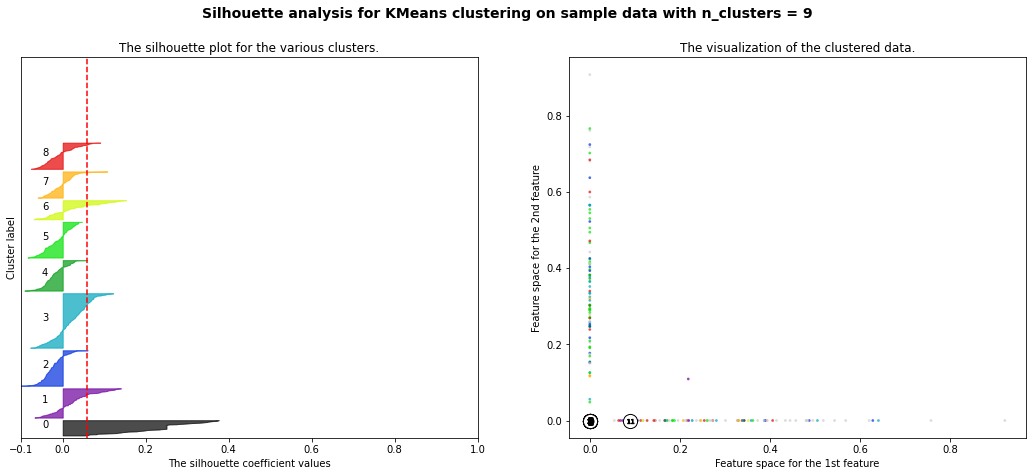

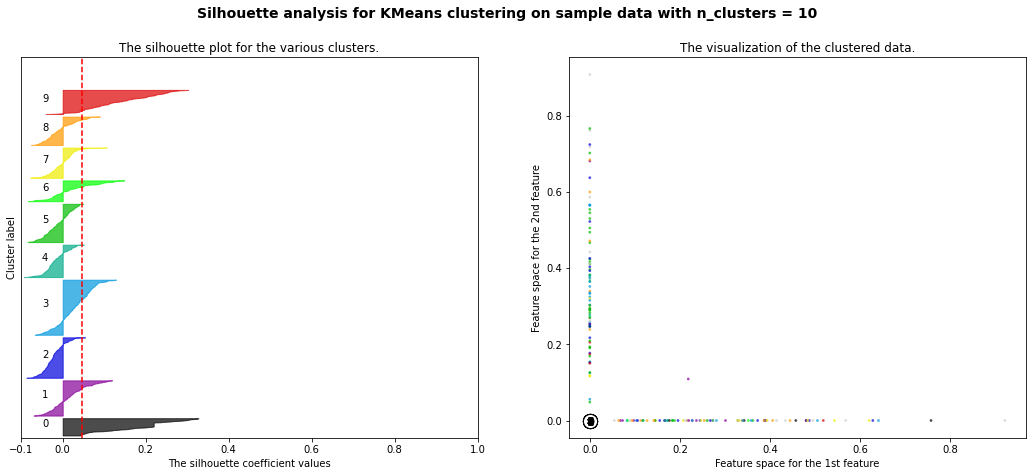

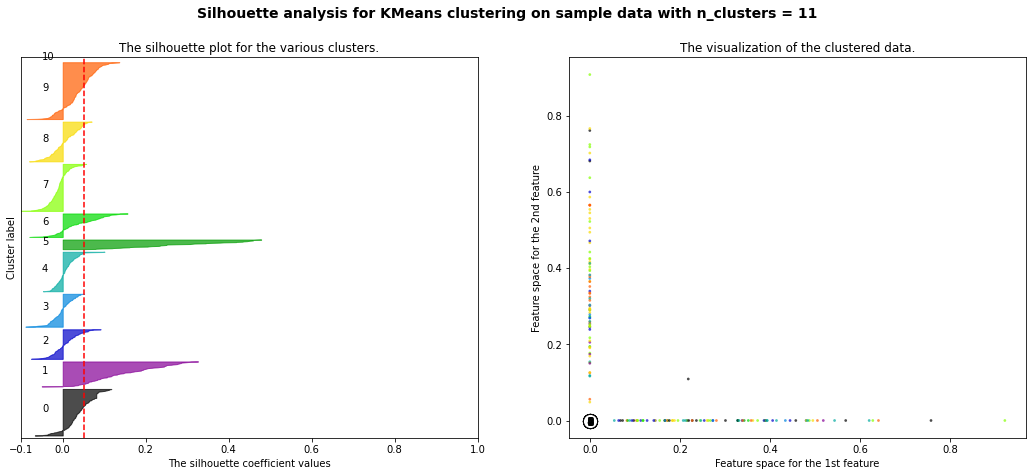

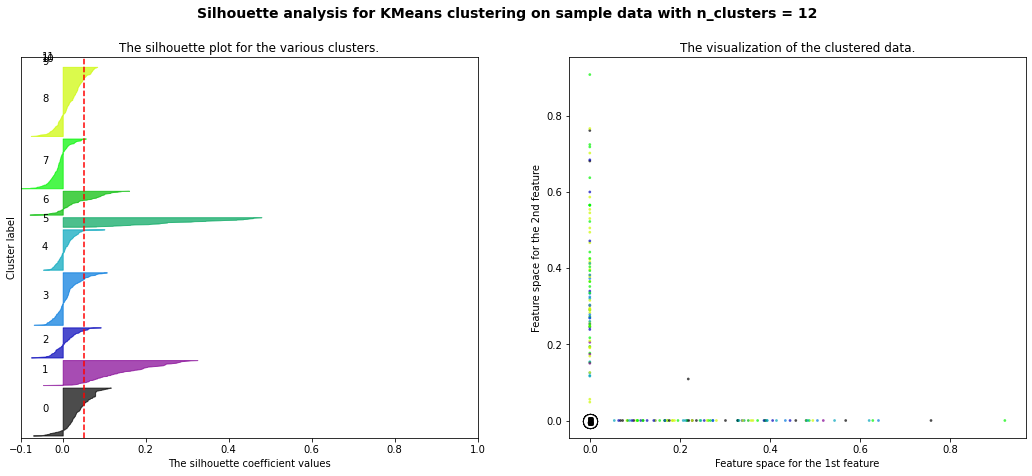

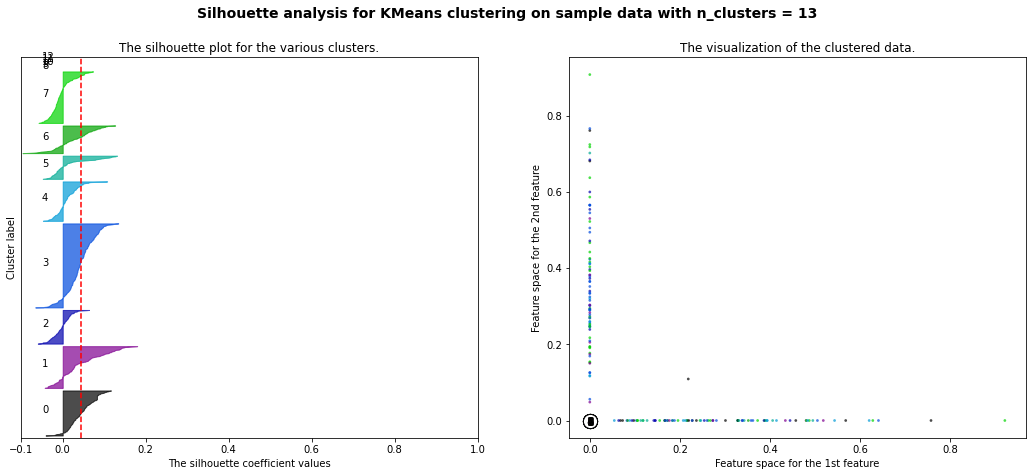

In [34]:

X = np.array(denselist)
# range_n_clusters = [1,2,3,5,7]
#  for k in range(2,11)
for n_clusters in range(2,14):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=i, random_state=0,metric='cosine', init='heuristic')
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels,metric='cosine',sample_size=1000,random_state=200)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [35]:
from sklearn_extra.cluster import KMedoids

def k_mediods(
	X, 
    k, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    kmedoids = KMedoids(n_clusters=k, random_state=0,metric='cosine', init='heuristic',).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, kmedoids.labels_):0.2f}")
    print(f"Inertia:{kmedoids.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, kmedoids.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[kmedoids.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
          try:  
              print( 
                    f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
          except ValueError:
            pass
    return kmedoids, kmedoids.labels_

In [36]:
docs = med_data['text_data'].values
import os
import random
SEED = 500
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

clustering, cluster_labels = k_mediods(
	X=np.array(denselist),
    k=14,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in all_keywords],
    "cluster": cluster_labels
})

For n_clusters = 14
Silhouette coefficient: -0.01
Inertia:915.963474659156
Silhouette values:
    Cluster 10: Size:43 | Avg:0.22 | Min:-0.02 | Max: 0.42
    Cluster 0: Size:45 | Avg:0.19 | Min:-0.01 | Max: 0.36
    Cluster 9: Size:101 | Avg:0.09 | Min:-0.07 | Max: 0.28
    Cluster 6: Size:72 | Avg:0.07 | Min:-0.12 | Max: 0.24
    Cluster 2: Size:127 | Avg:0.02 | Min:-0.09 | Max: 0.17
    Cluster 3: Size:204 | Avg:-0.02 | Min:-0.13 | Max: 0.09
    Cluster 7: Size:104 | Avg:-0.04 | Min:-0.12 | Max: 0.07
    Cluster 1: Size:95 | Avg:-0.05 | Min:-0.11 | Max: 0.04
    Cluster 8: Size:84 | Avg:-0.05 | Min:-0.13 | Max: 0.03
    Cluster 5: Size:135 | Avg:-0.06 | Min:-0.15 | Max: 0.01
    Cluster 13: Size:130 | Avg:-0.06 | Min:-0.12 | Max: 0.01
    Cluster 12: Size:93 | Avg:-0.06 | Min:-0.12 | Max: 0.02
    Cluster 11: Size:143 | Avg:-0.07 | Min:-0.12 | Max: -0.00
    Cluster 4: Size:124 | Avg:-0.07 | Min:-0.11 | Max: -0.00


In [32]:
from collections import Counter
for i in range(20):
    tokens_per_cluster = ""
    most_frequent = Counter(" ".join(df_clusters.query(f"cluster == {i}")["tokens"]).split()).most_common(5)
    for t in most_frequent:
        tokens_per_cluster += f"{t[0]}({str(t[1])}) "
    print(f"Cluster {i}: {tokens_per_cluster}")

Cluster 0: medical(32) device(20) known(12) used(11) drug(8) 
Cluster 1: medical(112) device(89) implants(40) company(39) medicine(36) 
Cluster 2: electrophysiology(79) heart(77) cardiac(72) medicine(52) electrical(50) 
Cluster 3: imaging(355) medical(213) resonance(202) magnetic(153) used(69) 
Cluster 4: medical(111) imaging(63) used(35) american(29) known(27) 
Cluster 5: imaging(89) resonance(78) magnetic(63) medical(55) radiology(51) 
Cluster 6: medical(153) devices(127) device(77) medicine(22) implants(21) 
Cluster 7: used(72) medical(58) device(51) designed(46) equipment(41) 
Cluster 8: device(48) devices(46) used(44) drug(41) medical(39) 
Cluster 9: surgical(95) used(74) surgery(58) medical(51) medicine(41) 
Cluster 10: dental(43) equipment(26) used(24) use(14) implants(12) 
Cluster 11: used(93) medicine(93) implants(59) therapy(51) medical(43) 
Cluster 12: used(59) use(38) devices(29) high(29) including(28) 
Cluster 13: used(68) imaging(49) called(38) ray(38) medical(34) 
Cluste

In [33]:
test_cluster = 8
most_representative_docs = np.argsort(
    np.linalg.norm(denselist - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:5]:
    print(docs[d])
    print("-------------")

Inhaler,An inhaler (also known as a puffer, pump or allergy spray) is a medical device used for delivering medicines into the lungs through the work of a person's breathing. This allows medicines to be delivered to and absorbed in the lungs, which provides the ability for targeted medical treatment to this specific region of the body, as well as a reduction in the side effects of oral medications. There are a wide variety of inhalers, and they are commonly used to treat numerous medical conditions with asthma and chronic obstructive pulmonary disease (COPD) being among the most notable. Some of the common types of inhalers include meter-dosed inhalers, dry powder inhalers, soft mist inhalers, and nebulizers. Each device has advantages and disadvantages and can be selected based on specific patient needs, as well as age, coordination, and lung function. Proper education on inhaler use is important to ensure that inhaled medication takes its proper effects in the lungs.Drug delivery devi

In [34]:
for i,t in enumerate(df_clusters.query(f"cluster == {test_cluster}").sample(4).iterrows()):
    print(t[1]["text"])
    print("-------------")

Ringer's solution,Ringer's solution is a solution of several salts dissolved in water for the purpose of creating an isotonic solution relative to the body fluids of an animal. Ringer's solution typically contains sodium chloride, potassium chloride, calcium chloride and sodium bicarbonate, with the last used to balance the pH. Other additions can include chemical fuel sources for cells, including ATP and dextrose, as well as antibiotics and antifungals.Intravenous fluids
-------------
Endovascular aneurysm repair,Endovascular aneurysm repair (EVAR), is a type of minimally-invasive endovascular surgery used to treat pathology of the aorta, most commonly an abdominal aortic aneurysm (AAA). When used to treat thoracic aortic disease, the procedure is then specifically termed TEVAR for "thoracic endovascular aortic/aneurysm repair." The procedure involves the placement of an expandable stent graft within the aorta to treat aortic disease without operating directly on the aorta. In 2003, E

In [ ]:
# Compute DBSCAN
X = np.array(denselist)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
      # % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
      # % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 1787
Silhouette Coefficient: -0.247


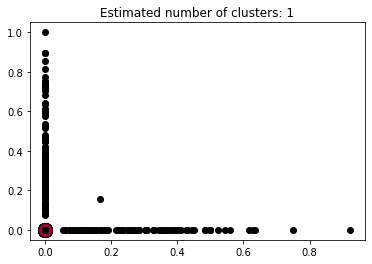

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Automatically created module for IPython interactive environment
number of estimated clusters : 1


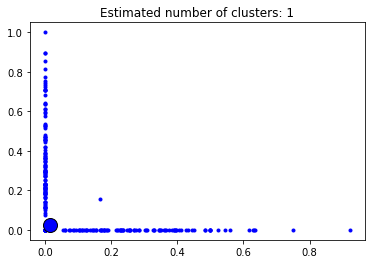

In [ ]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
X =X = np.array(denselist)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()